In [24]:
## Jupyter notebook in python
## Calculates tha quality of the identified analogues - are the analogues close enough to the event to actually be useful analogues?

## Caveat: 

In [25]:
import analogue_functions_C3S as my

import xarray as xr
import os
import subprocess
import numpy as np
import iris
import calendar
import matplotlib.pyplot as plt
import matplotlib
cmaps = matplotlib.colormaps
import sys
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.feature as cf
import netCDF4 as nc
import glob

from scipy.stats.stats import pearsonr
import scipy.stats as stats

/tmp/ipykernel_3256674/2326992444.py:19: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [26]:
# Defining the variables:
date = [2025, 'Jun', 21] 
R1 = [65, 35, 35, -20] 
ana_var = 'z500' # Circulation variable, 'msl' or 'z500'


In [27]:
# Variables that should only be changed for sensitivity testing
# months to include, automatically three calendar month window around the event
month = date[1]
X = list(calendar.month_abbr)
i=X.index(month)
if 1<i<12:
    months = [X[i-1], X[i], X[i+1]]
elif i == 1:
    months = [X[12], X[i], X[i+1]]
elif i ==12:
    months = [X[i-1], X[i], X[1]]


# Past time range
Y1 = 1950 
Y2 = 1980 
# Present time range
Y3 = 1994 
Y4 = 2024 
# Number of analogues - ToDo: change so it is automatically 1% of days (however many months included)
N = 30

In [28]:
# Check if using ERA5 or extended forecast (for when ERA5 not yet available)
event_data = 'era5'
# Initially using ERA5 daily data, if that gives no data switch to extended:
if my.reanalysis_data_single_date('t2m', date)==None:
    my.ERA5FILESUFFIX = "_daily_extended"
    event_data = "extended"
    print('ERA5 data not yet available, using ECMWF extended forecast for event data')

# If extended also not available give error message:
if my.reanalysis_data_single_date('t2m', date)==None:
    print('Data is not available for that date, please select a date between 1 Jan 1950 and the present day')
    quit() ## If the date has not data (ERA5 or extended) then stop here, and print message above

# Check what it is using:
my.ERA5FILESUFFIX

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_t2m_daily_extended.nc for date [2025, 'Jun', 21]
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_t2m_daily_extended.nc for date [2025, 'Jun', 21]


'_daily_extended'

In [29]:
## Top N analogues over a definied period

dates_past = my.anomaly_period_outputs(Y1, Y2, ana_var, N, date, months, R1)
print('PAST complete')

dates_prst = my.anomaly_period_outputs(Y3, Y4, ana_var, N, date, months, R1)
print('PRESENT complete')


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2025, 'Jun', 21]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

PAST complete


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2025, 'Jun', 21]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

PRESENT complete


In [30]:
P1_msl = my.reanalysis_data(ana_var, Y1, Y2, months) # Get ERA5 data, Y1 to Y2, for var and season chosen. Global.
event = my.reanalysis_data_single_date(ana_var, date)
X1 = my.eucdist_of_datelist(event, P1_msl, dates_past, R1)
Qevent_past = sum(X1)/len(X1)

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2025, 'Jun', 21]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [31]:
P1_msl = my.reanalysis_data(ana_var, Y3, Y4, months) # Get ERA5 data, Y1 to Y2, for var and season chosen. Global.
event = my.reanalysis_data_single_date(ana_var, date)
X2 = my.eucdist_of_datelist(event, P1_msl, dates_prst, R1)
Qevent_prst = sum(X2)/len(X2)

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2025, 'Jun', 21]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [32]:
print(Qevent_past)
print(Qevent_prst)

112340650276831.17
106587880103157.44


In [33]:
# need to run on all analogue dates....
Q_past = []
P1_msl = my.reanalysis_data(ana_var, Y1, Y2, months) # Get ERA5 data, Y1 to Y2, for var and season chosen. Global.
for each in dates_past:
    print(each)
    print(len(Q_past))
    yr = int(each[:4])
    mon = calendar.month_abbr[int(each[4:-2])]
    day = int(each[-2:])
    new_dates = my.anomaly_period_outputs(Y1, Y2, ana_var, N, [yr, mon, day], months, R1)
    event = my.reanalysis_data_single_date(ana_var, [yr, mon, day]) # could this be taken from P1_msl?
    X = my.eucdist_of_datelist(event, P1_msl, new_dates, R1)
    Q_past.append(sum(X)/len(X))


19760622
0


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1976, 'Jun', 22]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1976, 'Jun', 22]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19640517
1


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1964, 'May', 17]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1964, 'May', 17]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19690715
2


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1969, 'Jul', 15]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1969, 'Jul', 15]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19500708
3


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1950, 'Jul', 8]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1950, 'Jul', 8]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19610629
4


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1961, 'Jun', 29]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1961, 'Jun', 29]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19500602
5


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1950, 'Jun', 2]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1950, 'Jun', 2]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19590704
6


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1959, 'Jul', 4]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1959, 'Jul', 4]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19510721
7


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1951, 'Jul', 21]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1951, 'Jul', 21]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19730525
8


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1973, 'May', 25]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1973, 'May', 25]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19760611
9


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1976, 'Jun', 11]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1976, 'Jun', 11]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19640717
10


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1964, 'Jul', 17]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1964, 'Jul', 17]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19760704
11


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1976, 'Jul', 4]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1976, 'Jul', 4]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19760711
12


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1976, 'Jul', 11]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1976, 'Jul', 11]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19730615
13


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1973, 'Jun', 15]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1973, 'Jun', 15]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19500720
14


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1950, 'Jul', 20]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1950, 'Jul', 20]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19580615
15


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1958, 'Jun', 15]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1958, 'Jun', 15]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19520701
16


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1952, 'Jul', 1]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1952, 'Jul', 1]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19670712
17


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1967, 'Jul', 12]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1967, 'Jul', 12]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19570629
18


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1957, 'Jun', 29]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1957, 'Jun', 29]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19560708
19


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1956, 'Jul', 8]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1956, 'Jul', 8]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19590621
20


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1959, 'Jun', 21]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1959, 'Jun', 21]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19690722
21


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1969, 'Jul', 22]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1969, 'Jul', 22]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19530525
22


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1953, 'May', 25]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1953, 'May', 25]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19650614
23


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1965, 'Jun', 14]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1965, 'Jun', 14]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19660502
24


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1966, 'May', 2]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1966, 'May', 2]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19600617
25


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1960, 'Jun', 17]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1960, 'Jun', 17]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19580719
26


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1958, 'Jul', 19]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1958, 'Jul', 19]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19580607
27


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1958, 'Jun', 7]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1958, 'Jun', 7]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19520613
28


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1952, 'Jun', 13]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1952, 'Jun', 13]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19650515
29


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1965, 'May', 15]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1965, 'May', 15]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [34]:
Q_prst = []
P1_msl = my.reanalysis_data(ana_var, Y3, Y4, months) # Get ERA5 data, Y1 to Y2, for var and season chosen. Global.
for each in dates_prst:
    print(each)
    print(len(Q_prst))
    yr = int(each[:4])
    mon = calendar.month_abbr[int(each[4:-2])]
    day = int(each[-2:])
    new_dates = my.anomaly_period_outputs(Y3, Y4, ana_var, N, [yr, mon, day], months, R1)
    event = my.reanalysis_data_single_date(ana_var, [yr, mon, day])
    X = my.eucdist_of_datelist(event, P1_msl, new_dates, R1)
    Q_prst.append(sum(X)/len(X))

20160719
0


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2016, 'Jul', 19]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2016, 'Jul', 19]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20010625
1


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2001, 'Jun', 25]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2001, 'Jun', 25]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20190629
2


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2019, 'Jun', 29]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2019, 'Jun', 29]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20040608
3


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2004, 'Jun', 8]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2004, 'Jun', 8]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20220718
4


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2022, 'Jul', 18]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2022, 'Jul', 18]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20150630
5


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2015, 'Jun', 30]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2015, 'Jun', 30]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20050618
6


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2005, 'Jun', 18]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2005, 'Jun', 18]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19950725
7


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1995, 'Jul', 25]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1995, 'Jul', 25]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20030531
8


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2003, 'May', 31]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2003, 'May', 31]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20100605
9


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2010, 'Jun', 5]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2010, 'Jun', 5]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20200507
10


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2020, 'May', 7]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2020, 'May', 7]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20190723
11


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2019, 'Jul', 23]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2019, 'Jul', 23]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20050623
12


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2005, 'Jun', 23]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2005, 'Jun', 23]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20000618
13


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2000, 'Jun', 18]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2000, 'Jun', 18]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19950501
14


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1995, 'May', 1]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1995, 'May', 1]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20060718
15


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2006, 'Jul', 18]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2006, 'Jul', 18]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20170718
16


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2017, 'Jul', 18]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2017, 'Jul', 18]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19960722
17


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1996, 'Jul', 22]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1996, 'Jul', 22]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20210721
18


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2021, 'Jul', 21]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2021, 'Jul', 21]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20030625
19


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2003, 'Jun', 25]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2003, 'Jun', 25]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20170526
20


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2017, 'May', 26]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2017, 'May', 26]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19940502
21


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1994, 'May', 2]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1994, 'May', 2]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20130716
22


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2013, 'Jul', 16]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2013, 'Jul', 16]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20000514
23


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2000, 'May', 14]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2000, 'May', 14]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20030616
24


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2003, 'Jun', 16]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2003, 'Jun', 16]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20130722
25


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2013, 'Jul', 22]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2013, 'Jul', 22]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20160607
26


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2016, 'Jun', 7]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2016, 'Jun', 7]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


19940701
27


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1994, 'Jul', 1]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [1994, 'Jul', 1]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20220515
28


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2022, 'May', 15]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2022, 'May', 15]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


20220615
29


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2022, 'Jun', 15]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily_extended.nc for date [2022, 'Jun', 15]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/analysis/cartography.py:413: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


Difference is not statistically significant


Text(0, 0.5, 'Quality Index (greater = less similar)')

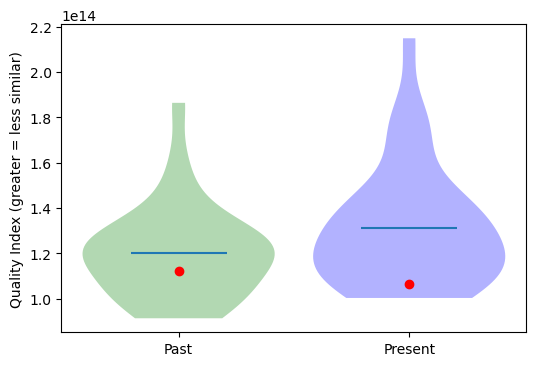

In [35]:
# Violin plots of quality
u, p = stats.ttest_ind(Q_past, Q_prst, equal_var=False, alternative='two-sided')
if p < 0.05:
    print('Statistically significant difference')
else:
    print('Difference is not statistically significant')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
colors=['g','b']
v2 = ax.violinplot([Q_past, Q_prst], [1, 1.6], showmeans=True, showextrema=False, showmedians=False)
for pc, color in zip(v2['bodies'], colors):
    pc.set_facecolor(color)
#ax.axhline(P_event, color='r')
#ax.axhline(np.mean(P_past), color='g')
#ax.axhline(np.mean(P_prst), color='b')
ax.plot([1, 1.6], [Qevent_past, Qevent_prst], 'o', color='r')

ax.set_xticks([1, 1.6])
ax.set_xticklabels(['Past', 'Present'])
ax.set_ylabel('Quality Index (greater = less similar)')


In [36]:
# Summary print out
print('Summary: identify analogues domain')
print('Event definition:')
print('     Date: ', date)
print('Analogue calulation:')
print('     Months assessed: ', months)
print('     Number of analogues: ', N)
print('     Analogue domain: ', R1)
print('     Circulation variable: ', ana_var)
print('Timeslices:')
print('      Past: ',Y1,'-',Y2)
print('      Present: ',Y3,'-',Y4)


u, p = stats.ttest_ind(X1, X2, equal_var=False, alternative='two-sided')
if np.mean(X1) > np.mean(X2):
    print('Present analogues more similar to the event')
else:
    print('Past analogues more similar to the event')

if p < 0.05:
    print('  Statistically significant difference')
else:
    print('  Difference is not statistically significant')

if Qevent_past > np.max(Q_past):
    print('No good analogues within past timeslice')
else:
    # where does Qevent_past rankw within Q_past
    print('Event at ',round(stats.percentileofscore(Q_past, Qevent_past),0),' percentile of past analogues')

if Qevent_prst > np.max(Q_prst):
    print('No good analogues within present timeslice')
else:
    # where does Qevent_past rankw within Q_past
    print('Event at ',round(stats.percentileofscore(Q_prst, Qevent_prst),0),' percentile of present analogues')


Summary: identify analogues domain
Event definition:
     Date:  [2025, 'Jun', 21]
Analogue calulation:
     Months assessed:  ['May', 'Jun', 'Jul']
     Number of analogues:  30
     Analogue domain:  [65, 35, 35, -20]
     Circulation variable:  z500
Timeslices:
      Past:  1950 - 1980
      Present:  1994 - 2024
Present analogues more similar to the event
  Difference is not statistically significant
Event at  37.0  percentile of past analogues
Event at  13.0  percentile of present analogues
